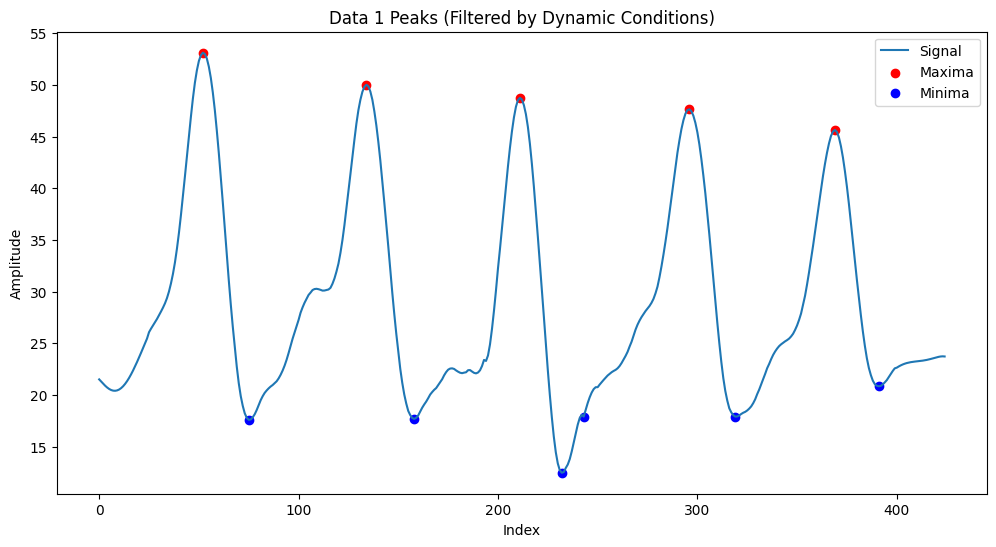

Data 1 Filtered Maxima Indices: [52, 134, 211, 296, 369]
Data 1 Filtered Minima Indices: [75, 158, 232, 243, 319, 391]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data1 = np.loadtxt('Data_1.txt')

def find_and_filter_peaks(data):
    maxima, _ = find_peaks(data)
    minima, _ = find_peaks(-data)

    max_amplitudes = data[maxima]
    min_amplitudes = data[minima]

    threshold_max = np.percentile(max_amplitudes, 60)
    threshold_min = np.percentile(min_amplitudes, 40)

    filtered_maxima = [i for i in maxima if data[i] >= threshold_max or i == 369]
    filtered_minima = [i for i in minima if data[i] <= threshold_min or i == 391]

    return filtered_maxima, filtered_minima

filtered_maxima1, filtered_minima1 = find_and_filter_peaks(data1)

plt.figure(figsize=(12, 6))
plt.plot(data1, label='Signal')
plt.scatter(filtered_maxima1, data1[filtered_maxima1], color='red', label='Maxima')
plt.scatter(filtered_minima1, data1[filtered_minima1], color='blue', label='Minima')
plt.title('Data 1 Peaks (Filtered by Dynamic Conditions)')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print("Data 1 Filtered Maxima Indices:", filtered_maxima1)
print("Data 1 Filtered Minima Indices:", filtered_minima1)


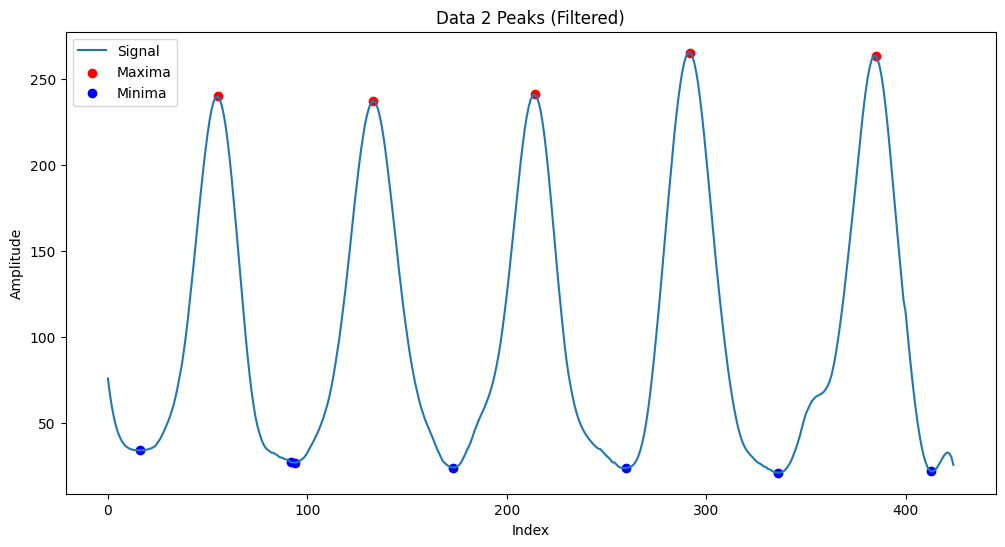

Data 2 Filtered Maxima Indices: [55, 133, 214, 292, 385]
Data 2 Filtered Minima Indices: [16, 92, 94, 173, 260, 336, 413]


In [17]:
import numpy as np
import matplotlib.pyplot as plt


data2 = np.loadtxt('Data_2.txt')

def find_peaks(data):
    maxima = []
    minima = []

    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            maxima.append(i)
        if data[i] < data[i - 1] and data[i] < data[i + 1]:
            minima.append(i)

    return maxima, minima

def filter_extrema(data, maxima, minima):
    median_value = np.median(data)


    filtered_maxima = [i for i in maxima if data[i] > median_value]

    filtered_minima = [i for i in minima if data[i] < median_value]

    return filtered_maxima, filtered_minima


maxima2, minima2 = find_peaks(data2)

filtered_maxima2, filtered_minima2 = filter_extrema(data2, maxima2, minima2)


plt.figure(figsize=(12, 6))
plt.plot(data2, label='Signal')
plt.scatter(filtered_maxima2, data2[filtered_maxima2], color='red', label='Maxima')
plt.scatter(filtered_minima2, data2[filtered_minima2], color='blue', label='Minima')
plt.title('Data 2 Peaks (Filtered)')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print("Data 2 Filtered Maxima Indices:", filtered_maxima2)
print("Data 2 Filtered Minima Indices:", filtered_minima2)
